## O preço do petróleo influência ou é influenciado por quais outros fatores ?

Esse trabalho tem como intuito investigar esse fenômeno , aplicando conhecimentos de pre processamento , visualização de dados , mineiração de dados , entre outras técnicas .

### Universidade Federal de São Carlos 


### Aluno : Yago David Pimenta RA : 800273

### Professora : Marcela Ribeiro

 ### Importante :

Para a primeira etapa do trabalho , de maneira não sábia , eu tinha escolhido trabalhar com vários datasets com formatos diferentes de tempo (alguns contavam dia sim dia não , outros começavam em um período de tempo muito remoto , outros em ordem decrescente ) , enfim , para solucionar esse problema precisaria de muita gambiarra e mesmo assim não ficaria bom o resultado final . Portanto , para facilitar o entendimento , resolvi escolher um dataset que contenha as principais informações para a minha análise . Sendo assim , algumas hipóteses vão sofrer adaptações .

### Primeiro passo : IMPORTAR DADOS

In [3]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
from google.colab import files
uploaded = files.upload()

Saving raw_v2_dataset.csv to raw_v2_dataset.csv


link dataset : https://www.kaggle.com/datasets/sourabhkumarburnwal/bitcoin-and-stock-market-datasets?select=raw_v2_dataset.csv

### Definir o dataframe

In [5]:
df_geral = pd.read_csv('raw_v2_dataset.csv')

### Observando as informações sobre os dataframe

In [6]:
df_geral.head()

,Unnamed: 0,Date,BTC price [USD],Volume BTC,Gold price[USD],Oil WTI price[USD],SP500 close index,BTC n-transactions,BTC google search interest,VIX Close
0,0,2014-12-01,370.0,0.06,1332.5,68.98,2053.44,79098.0,3,14.29
1,1,2014-12-02,378.0,15.01,1314.7,66.99,2066.55,99419.0,3,12.85
2,2,2014-12-03,378.0,0.55,1325.8,67.30,2074.33,99419.0,3,12.47
3,3,2014-12-04,377.1,0.01,1324.2,66.73,2071.92,99419.0,3,12.38
4,4,2014-12-05,377.1,0.00,1310.8,65.89,2075.37,90900.0,3,11.82


Vamos entender melhor meus atributos :

.BTC price : preço do bitcoin

.Gold price : preco do ouro

.Oil WTI price : preco do petróleo bruto

.SP500 index : Ele vai conter as 500 maiores empresas , em valor de mercado do mundo , e vai fazer uma média das variações delas durante o dia , simbolizando assim o tendência média entre as ações nos EUA  principalmente .

.Vix : É o famoso índice do medo , ele vai medir o receio das pessoas em investirem em rendas variáveis .

Minha análise se pautara sobre esses aspectos .

In [7]:
df_geral.info

<bound method DataFrame.info of       Unnamed: 0        Date  BTC price [USD]  Volume BTC  Gold price[USD]  \
0              0  2014-12-01           370.00        0.06          1332.50   
1              1  2014-12-02           378.00       15.01          1314.70   
2              2  2014-12-03           378.00        0.55          1325.80   
3              3  2014-12-04           377.10        0.01          1324.20   
4              4  2014-12-05           377.10        0.00          1310.80   
...          ...         ...              ...         ...              ...   
1360        1360  2020-05-08          9810.00    25608.21          1713.90   
1361        1361  2020-05-11          8572.40    36356.85          1698.00   
1362        1362  2020-05-12          8821.42    19825.54          1706.80   
1363        1363  2020-05-13          9321.26    20859.19          1716.40   
1364        1364  2020-05-14          9441.08     4622.30          1736.35   

      Oil WTI price[USD]  SP500

In [8]:
df_geral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1365 non-null   int64  
 1   Date                        1365 non-null   object 
 2   BTC price [USD]             1365 non-null   float64
 3   Volume BTC                  1365 non-null   float64
 4   Gold price[USD]             1365 non-null   float64
 5   Oil WTI price[USD]          1365 non-null   float64
 6   SP500 close index           1365 non-null   float64
 7   BTC n-transactions          1365 non-null   float64
 8   BTC google search interest  1365 non-null   int64  
 9   VIX Close                   1365 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 106.8+ KB


In [9]:
df_geral.describe()

,Unnamed: 0,BTC price [USD],Volume BTC,Gold price[USD],Oil WTI price[USD],SP500 close index,BTC n-transactions,BTC google search interest,VIX Close
count,1365.00000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000
mean,682.00000,4169.047451,12266.697355,1343.260916,51.891619,2479.272103,242169.406593,12.325275,16.412674
std,394.18587,3983.986177,11281.452481,119.471181,11.083033,379.182688,80382.192997,14.523708,7.913542
min,0.00000,120.000000,0.000000,1097.700000,-36.980000,1829.080000,59344.000000,2.000000,9.140000
25%,341.00000,444.880000,6127.140000,1272.400000,46.210000,2102.440000,193578.000000,3.000000,12.390000
50%,682.00000,3380.010000,8889.980000,1324.200000,52.010000,2459.270000,242303.000000,10.000000,14.280000
75%,1023.00000,7414.080000,14852.080000,1392.100000,58.840000,2793.840000,303632.000000,15.000000,17.660000
max,1364.00000,19039.000000,160540.990000,1768.900000,77.410000,3386.150000,439549.000000,100.000000,82.690000


### Pré Processando

( Vamos pegar o contéudos dos slides e aplicar alguns pré processamento só para mostrar que estamos entendendo da matéria)

**Primeiro** : Seleção de características , como ja dito em cima eu não vou usar as informações sobre Volume , BTC n-transactions e BTC google search,logo vou remover elas do dataframe .

In [10]:
df = df_geral.drop(columns=['Volume BTC', 'BTC n-transactions','BTC google search interest','Unnamed: 0'])


In [11]:
df

,Date,BTC price [USD],Gold price[USD],Oil WTI price[USD],SP500 close index,VIX Close
0,2014-12-01,370.00,1332.50,68.98,2053.44,14.29
1,2014-12-02,378.00,1314.70,66.99,2066.55,12.85
2,2014-12-03,378.00,1325.80,67.30,2074.33,12.47
3,2014-12-04,377.10,1324.20,66.73,2071.92,12.38
4,2014-12-05,377.10,1310.80,65.89,2075.37,11.82
...,...,...,...,...,...,...
1360,2020-05-08,9810.00,1713.90,24.73,2929.80,27.98
1361,2020-05-11,8572.40,1698.00,24.02,2930.19,27.57
1362,2020-05-12,8821.42,1706.80,24.02,2870.12,33.04
1363,2020-05-13,9321.26,1716.40,24.02,2820.00,35.28


**Segundo** : Preciso ver se tem algum dado faltante 

In [12]:
df.isnull().values.any()

False

**Terceiro**: Vou fazer uma normalização e inserir eles no dataframe , para as 3 colunas de preço , afim de facilitar a análise .

.Normalização min-max:

In [13]:
normalized_df_oil=(df['Oil WTI price[USD]']-df['Oil WTI price[USD]'].min())/(df['Oil WTI price[USD]'].max()-df['Oil WTI price[USD]'].min())

In [14]:
normalized_df_oil

0       0.926305
1       0.908908
2       0.911618
3       0.906635
4       0.899292
          ...   
1360    0.539470
1361    0.533263
1362    0.533263
1363    0.533263
1364    0.533263
Name: Oil WTI price[USD], Length: 1365, dtype: float64

In [15]:
normalized_df_gold=(df['Gold price[USD]']-df['Gold price[USD]'].min())/(df['Gold price[USD]'].max()-df['Gold price[USD]'].min())

In [16]:
normalized_df_gold

0       0.349821
1       0.323302
2       0.339839
3       0.337455
4       0.317491
          ...   
1360    0.918057
1361    0.894368
1362    0.907479
1363    0.921782
1364    0.951505
Name: Gold price[USD], Length: 1365, dtype: float64

In [17]:
normalized_df_bitcoin=(df['BTC price [USD]']-df['BTC price [USD]'].min())/(df['BTC price [USD]'].max()-df['BTC price [USD]'].min())

In [18]:
normalized_df_bitcoin

0       0.013214
1       0.013637
2       0.013637
3       0.013590
4       0.013590
          ...   
1360    0.512184
1361    0.446768
1362    0.459930
1363    0.486350
1364    0.492684
Name: BTC price [USD], Length: 1365, dtype: float64

In [19]:
normalized_df_vix=(df['VIX Close']-df['VIX Close'].min())/(df['VIX Close'].max()-df['VIX Close'].min())

Agora para finalizar vamos adicioanar eles no dataframe original

In [20]:
df.insert(2, "BTC normalizado", normalized_df_bitcoin, True)

In [21]:
df.insert(4, "Gold normalizado", normalized_df_gold, True)

In [22]:
df.insert(6, "OIL normalizado", normalized_df_oil, True)

In [23]:
df.insert(8, "VIX normalizado", normalized_df_vix, True)

In [24]:
df

,Date,BTC price [USD],BTC normalizado,Gold price[USD],Gold normalizado,Oil WTI price[USD],OIL normalizado,SP500 close index,VIX normalizado,VIX Close
0,2014-12-01,370.00,0.013214,1332.50,0.349821,68.98,0.926305,2053.44,0.070020,14.29
1,2014-12-02,378.00,0.013637,1314.70,0.323302,66.99,0.908908,2066.55,0.050442,12.85
2,2014-12-03,378.00,0.013637,1325.80,0.339839,67.30,0.911618,2074.33,0.045275,12.47
3,2014-12-04,377.10,0.013590,1324.20,0.337455,66.73,0.906635,2071.92,0.044052,12.38
4,2014-12-05,377.10,0.013590,1310.80,0.317491,65.89,0.899292,2075.37,0.036438,11.82
...,...,...,...,...,...,...,...,...,...,...
1360,2020-05-08,9810.00,0.512184,1713.90,0.918057,24.73,0.539470,2929.80,0.256152,27.98
1361,2020-05-11,8572.40,0.446768,1698.00,0.894368,24.02,0.533263,2930.19,0.250578,27.57
1362,2020-05-12,8821.42,0.459930,1706.80,0.907479,24.02,0.533263,2870.12,0.324949,33.04
1363,2020-05-13,9321.26,0.486350,1716.40,0.921782,24.02,0.533263,2820.00,0.355404,35.28


Pronto , terminamos as etapas de pre processamento .

### Hipóteses : 

1 - O maior período de valorização do petróleo se deu na maior valorização do bitcoin .

Vamos começar plotando os dois gráficos para ver se visualmente encontramos alguma relação .

In [25]:
import plotly.graph_objects as go

In [26]:
time = [i for i in range(df.shape[0])]
series = np.array(df['Oil WTI price[USD]'])
times = np.array(time)

In [27]:
fig = go.Figure()
obj = go.Scatter(
    x = df['Date'],
    y = df['Oil WTI price[USD]'],
    mode = 'lines',
)
fig.add_trace(obj)
fig.update_layout(title='Preco do oleo bruto')
fig.show()

Curiosidade : No dia 20 de abril de 2020 por motivos da pandemia , pela primeira vez o petróleo estava custando menos que 0 dolars , pois ,devo as incertezas daquele momento , era mais caro extrair ele do que comercializar .

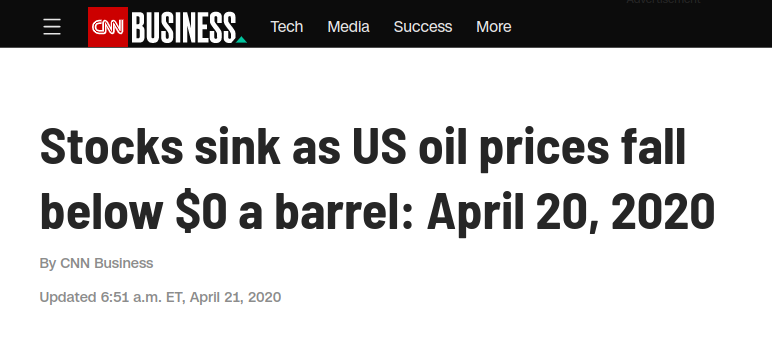

In [28]:
df['Oil WTI price[USD]'].min()

-36.98

In [29]:
series = np.array(df['BTC price [USD]'])

In [30]:
fig = go.Figure()
obj = go.Scatter(
    x = df['Date'],
    y = df['BTC price [USD]'],
    mode = 'lines',
)
fig.add_trace(obj)
fig.update_layout(title='Preco do bitcoin')
fig.show()

Visualmente falando , já da para perceber que a correlação deles deve ser baixissima , pois os gráficos não seguem uma tendência . Portando para provar isso vamos comparar eles matematicamente , utilizando **correlação**.

In [31]:
#Aqui eu vou querer olhar apenas os normalizados
df.corr()

,BTC price [USD],BTC normalizado,Gold price[USD],Gold normalizado,Oil WTI price[USD],OIL normalizado,SP500 close index,VIX normalizado,VIX Close
BTC price [USD],1.000000,1.000000,0.616467,0.616467,0.405656,0.405656,0.847212,0.064331,0.064331
BTC normalizado,1.000000,1.000000,0.616467,0.616467,0.405656,0.405656,0.847212,0.064331,0.064331
Gold price[USD],0.616467,0.616467,1.000000,1.000000,-0.053618,-0.053618,0.665148,0.337037,0.337037
Gold normalizado,0.616467,0.616467,1.000000,1.000000,-0.053618,-0.053618,0.665148,0.337037,0.337037
Oil WTI price[USD],0.405656,0.405656,-0.053618,-0.053618,1.000000,1.000000,0.460278,-0.494215,-0.494215
OIL normalizado,0.405656,0.405656,-0.053618,-0.053618,1.000000,1.000000,0.460278,-0.494215,-0.494215
SP500 close index,0.847212,0.847212,0.665148,0.665148,0.460278,0.460278,1.000000,-0.017472,-0.017472
VIX normalizado,0.064331,0.064331,0.337037,0.337037,-0.494215,-0.494215,-0.017472,1.000000,1.000000
VIX Close,0.064331,0.064331,0.337037,0.337037,-0.494215,-0.494215,-0.017472,1.000000,1.000000


Percebemos que a correlação entre o preço do bitcoin e do oléo é de 0.405656 , portanto é uma relação baixa entre os dois .

2 - O indice do medo (VIX) reflete que quanto mais alto ele for as pessoas vão optar por alternativas mais consagradas como o oléo bruto e vão comprar menos bitcoin .

In [46]:
#Como vou plotar os dois juntos vou ter que usar a normalização
fig = go.Figure()
obj1 = go.Scatter(
    x = df['Date'],
    y = df['BTC normalizado'],
    mode = 'lines',
    name='BTC',
)
obj2 = go.Scatter(
    x = df['Date'],
    y = df['OIL normalizado'],
    mode = 'lines',
    name='OIL',
)
obj3 = go.Scatter(
    x = df['Date'],
    y = df['VIX normalizado'],
    mode = 'lines',
    name='VIX',
)
fig.add_trace(obj1)
fig.add_trace(obj2)
fig.add_trace(obj3)
fig.update_layout(title='Qual a relação entre VIX e OIL e BTC')
fig.show()

Esse gráfico demonstra algo bem legal , no periodo de maior alta do índice vix , em março de 2020 houve uma queda brusca tanto do bitcoin como do oleo .

Vamos olhar para a tabela de correlação e ver se percebemos algo :

BTC e VIX :  0.06

OIL e VIX :  -0.49

**Resumindo** : Uma parte da nossa hipótese está certa e a outra não . Ou seja o valor negativo de -0.49 realmente confirme que quanto maior o "medo" que as pessoas sentem em relação ao mercado de ações , elas investem mais em commodities (algo mais seguro) . Já o valor próximo de 0 do 0.06 , não remete a nenhuma relação direta ao bitcoin . 

3 - Essa série temporal é estacionária ou não ? Especificamente quero saber sobre os dados do preço do petróleo bruto .

Definição de **série temporal estacionária** : De maneira geral, esperamos que as observações sejam estatisticamente consistentes. Na terminologia de séries temporais, isso é chamado de estacionariedade. O que quero dizer aqui é que as observações deverão apresentar uma aleatoriedade ao redor de uma média conforme o tempo se desenvolve.

. Série temporal Estacionária , pois os valores estão distribuidos em torno da média .

Exemplo : 
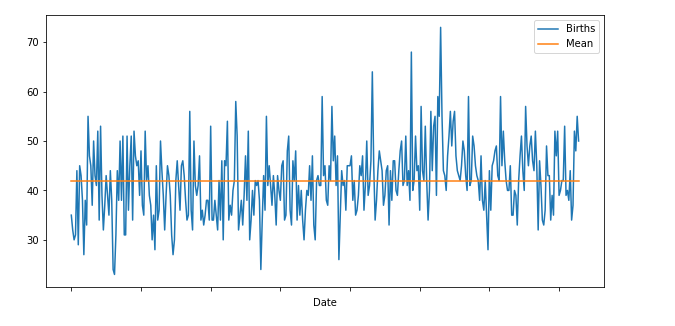

. Série Temporal com Tendência : 

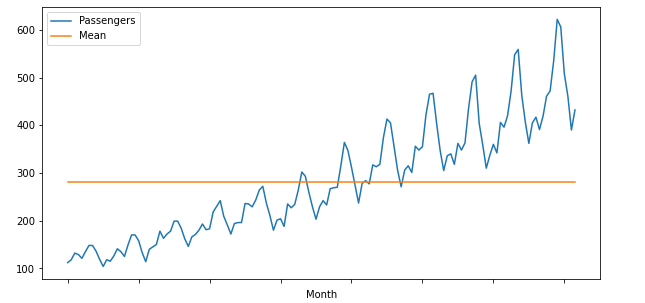

Para comprovar ou reporvar nossa hiótese  irei usar um método que não aprendemos em sala de aula , porém é muito útil . **Dickey-Fuller** : Este é um teste do tipo Hipótese de Raiz Unitária no qual ele tenta determinar determinar o quão forte a série temporal é definida por uma tendência.

In [33]:
from statsmodels.tsa.stattools import adfuller
data = df['Oil WTI price[USD]']
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Provavelmente não Estacionário')
else:
 print('Provavelmente Estacionário')

stat=-2.043, p=0.268
Provavelmente não Estacionário


In [34]:
from statsmodels.tsa.stattools import adfuller
data = df['VIX Close']
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Provavelmente não Estacionário')
else:
 print('Provavelmente Estacionário')

stat=-3.958, p=0.002
Provavelmente Estacionário


**Conclusões** : Probabilisticamente falando , provavelmente o preço temporal do petróleo bruto não é uma série temporal estacionária pelo método de Dickey-Fuller , enquanto o índice VIX é estacionário .

4 - O menor preço do petróleo se deu no mesmo período do menor preço do ouro.

Como ainda não visualizamos o gráfico do ouro e petróleo , iremos plotar eles juntos .

In [47]:
#Como vou plotar os dois juntos vou ter que usar a normalização
fig = go.Figure()
obj1 = go.Scatter(
    x = df['Date'],
    y = df['Gold normalizado'],
    mode = 'lines',
    name='GOLD'
)
obj2 = go.Scatter(
    x = df['Date'],
    y = df['OIL normalizado'],
    mode = 'lines',
    name='OIL'
)

fig.add_trace(obj1)
fig.add_trace(obj2)
fig.update_layout(title='Relação entre ouro e petróleo ')
fig.show()

Percebemos que no periodo da pandemia , as duas foram para baixo , mas para comprovar isso matematicamente , irei fazer um group by e irei fazer uma relação das duas .

In [36]:
df_2020 = df.iloc[1272:1350,:]

In [37]:
df_2020

,Date,BTC price [USD],BTC normalizado,Gold price[USD],Gold normalizado,Oil WTI price[USD],OIL normalizado,SP500 close index,VIX normalizado,VIX Close
1272,2020-01-02,6945.02,0.360750,1540.1,0.659118,61.17,0.858030,3257.85,0.045275,12.47
1273,2020-01-03,7334.45,0.381334,1564.5,0.695471,63.00,0.874027,3234.85,0.066349,14.02
1274,2020-01-06,7764.63,0.404072,1580.9,0.719905,63.27,0.876388,3246.28,0.064038,13.85
1275,2020-01-07,8158.52,0.424891,1586.3,0.727950,62.70,0.871405,3237.18,0.063222,13.79
1276,2020-01-08,8045.51,0.418918,1572.3,0.707092,59.65,0.844742,3253.05,0.058600,13.45
...,...,...,...,...,...,...,...,...,...,...
1345,2020-04-17,7037.46,0.365636,1698.8,0.895560,18.31,0.483346,2874.56,0.394426,38.15
1346,2020-04-20,6838.19,0.355103,1711.2,0.914035,-36.98,0.000000,2823.16,0.471652,43.83
1347,2020-04-21,6853.68,0.355922,1687.8,0.879172,8.91,0.401171,2736.56,0.493134,45.41
1348,2020-04-22,7136.84,0.370889,1738.3,0.954410,13.64,0.442521,2799.31,0.446499,41.98


In [48]:
#Como vou plotar os dois juntos vou ter que usar a normalização
fig = go.Figure()
obj1 = go.Scatter(
    x = df_2020['Date'],
    y = df_2020['Gold normalizado'],
    mode = 'lines',
    name='GOLD',
)
obj2 = go.Scatter(
    x = df_2020['Date'],
    y = df_2020['OIL normalizado'],
    mode = 'lines',
    name='OIL',
)

fig.add_trace(obj1)
fig.add_trace(obj2)
fig.update_layout(title='Apenas no período de maior congruência')
fig.show()

In [39]:
df_2020.corr()

,BTC price [USD],BTC normalizado,Gold price[USD],Gold normalizado,Oil WTI price[USD],OIL normalizado,SP500 close index,VIX normalizado,VIX Close
BTC price [USD],1.000000,1.000000,-0.048120,-0.048120,0.671918,0.671918,0.860311,-0.813487,-0.813487
BTC normalizado,1.000000,1.000000,-0.048120,-0.048120,0.671918,0.671918,0.860311,-0.813487,-0.813487
Gold price[USD],-0.048120,-0.048120,1.000000,1.000000,-0.472270,-0.472270,-0.173661,0.121292,0.121292
Gold normalizado,-0.048120,-0.048120,1.000000,1.000000,-0.472270,-0.472270,-0.173661,0.121292,0.121292
Oil WTI price[USD],0.671918,0.671918,-0.472270,-0.472270,1.000000,1.000000,0.797067,-0.764766,-0.764766
OIL normalizado,0.671918,0.671918,-0.472270,-0.472270,1.000000,1.000000,0.797067,-0.764766,-0.764766
SP500 close index,0.860311,0.860311,-0.173661,-0.173661,0.797067,0.797067,1.000000,-0.959725,-0.959725
VIX normalizado,-0.813487,-0.813487,0.121292,0.121292,-0.764766,-0.764766,-0.959725,1.000000,1.000000
VIX Close,-0.813487,-0.813487,0.121292,0.121292,-0.764766,-0.764766,-0.959725,1.000000,1.000000


Apesar de nesse período de pandemia o petróleo ter atingido seu menor valor e o ouro ter sofrido uma desvalorização brusca . Percebe-se que a correlação deles ainda continua pequena apontando o valor de -0.47 , ou seja , concluí-se que as variações que eles sofrem mesmo em um momento atípico não estão relacionados .

5 -  O SP500 é o oposto do índice VIX , uma vez que o SP500 mede o crescimento do mercado  e o vix o medo dos investidores perante ao mercado financeiro .

In [50]:
fig = go.Figure()
obj1 = go.Scatter(
    x = df['Date'],
    y = df['SP500 close index'],
    mode = 'lines',
    name='SP500',
)
obj2 = go.Scatter(
    x = df['Date'],
    y = df['VIX Close'],
    mode = 'lines',
    name='VIX',
)

fig.add_trace(obj1)
fig.add_trace(obj2)
fig.update_layout(title='Relação entre os dois índices')
fig.show()

Como não da para visualizar , vamos ter que normalizaro SP500 também .

In [41]:
normalized_df_sp=(df['SP500 close index']-df['SP500 close index'].min())/(df['SP500 close index'].max()-df['SP500 close index'].min())

In [42]:
df.insert(7, "SP500 normalizado", normalized_df_sp, True)

In [51]:
fig = go.Figure()
obj1 = go.Scatter(
    x = df['Date'],
    y = df['SP500 normalizado'],
    mode = 'lines',
    name='SP500'
)
obj2 = go.Scatter(
    x = df['Date'],
    y = df['VIX normalizado'],
    mode = 'lines',
    name='VIX'
)

fig.add_trace(obj1)
fig.add_trace(obj2)
fig.update_layout(title='Relação normalizada')
fig.show()

É possível perceber que para esses 7 anos , a hipótese não se aplica , porém ao olhar a tabela de correlação apenas para o ano de 2020 ela se aplicar pois o valor é de -0.95 , algo muito próximo de -1 . Portanto , para o período geral a hipótese é falsa , porém especificamente para 2020 ela é totalmente válida e também para dezembro de 2018 .

Observação : Infelizmente por eu ter usado apenas seéries temporais , não consegui pensar em nenhuma hipótese que pudesse ser respondida apenas com mineração de dados , não conseguindo assim , aplicar esse conhecimento .

Para finalizar nossa análise irei plotar todos os gráficos em um mesmo plot.

In [52]:
fig = go.Figure()
obj1 = go.Scatter(
    x = df['Date'],
    y = df['SP500 normalizado'],
    mode = 'lines',
    name='SP500'
)
obj2 = go.Scatter(
    x = df['Date'],
    y = df['VIX normalizado'],
    mode = 'lines',
    name='VIX'
)
obj3 = go.Scatter(
    x = df['Date'],
    y = df['Gold normalizado'],
    mode = 'lines',
    name='GOLD'
)
obj4 = go.Scatter(
    x = df['Date'],
    y = df['BTC normalizado'],
    mode = 'lines',
    name='BTC'
)
obj5 = go.Scatter(
    x = df['Date'],
    y = df['OIL normalizado'],
    mode = 'lines',
    name='OIL'
)
fig.add_trace(obj1)
fig.add_trace(obj2)
fig.add_trace(obj3)
fig.add_trace(obj4)
fig.add_trace(obj5)
fig.update_layout(title='Análise final dos gráficos')
fig.show()

### Conclusões finais :

A minha conclusão sobre esse trabalho foi ao mesmo tempo decepcionante como esperado . Para explicar melhor isso , irei começar explicando o pq de ser decepcionante : Antes de começar esse trabalho , eu realmente achei que eu iria encontrar alguma lógica em algumas variáveis que influenciariam o valor de mercado do petróleo . No entanto , infelizmente , não foi possível perceber de forma clara e homogênea uma relação entre eles , apenas algumas tendências em alguns períodos de tempos específicos , tal como demonstra as minhas hipóteses sobre esse trabalho . Já a parte do esperado , era porque , caso alguem conseguisse realmente determinar o intuito desse meu trabalho , poderia resultar em grandes vantagens financeiras , pois poderia investir na flutuação do preço do petróleo . Dito isso , essas são minhas considerações a respeito do tema do trabalho . 

Já a minha conclusão sobre as técnicas envolvidas na elaboração deste , posso afirmar que foi muito legal trabalhar com a biblioteca plotly express especificamente em graph objects , essa é uma ferramenta muito importante para análise de séries temporais . Contudo , não se resume a apenas felicidades , novamente , tentei em alguma das hipóteses relacionar o tema com algoritmos de mineração de dados aprendidos em sala de aula , porém não encontrei alguma situação ideal para usar esses algoritmos .

#### Referências :
https://plotly.com/python/plotly-express/

https://matplotlib.org/stable/index.html

https://pandas.pydata.org/docs/

https://towardsdatascience.comexploring-brent-oil-prices-data-using-python-9742b64aad57
